# Importing Prepared Dataset

In [36]:
import pandas as pd

In [37]:
df = pd.read_excel("CleanedData.xlsx")
df.head()

,Field_1,lead_id,status,lost_reason,budget,lease,movein,room_type,new_lease,Test
0,17754,ad466d1c65f66b7f6750218d1d2cebda80944ccb3db17c...,LOST,Not interested,Â£181 Â£240 Per Week,Full Year Course Stay 40 44 weeks,310822.0,Entire Place,42,240.0
1,38335,97ba75a60f65ac390b60a79d300d7628a90e6a3759fcad...,LOST,Low availability,Â£60 Â£120 Per week,Semester Stay 20 24 weeks,130922.0,Ensuite,24,120.0
2,43761,90ab296bd29fdd158966136bb7ebbad59b477370bf9342...,LOST,Not responding,150week,51 week,300922.0,Ensuite,51,18750.0
3,6659,adef163151cf4ad83253e7b881a4a22ff403c993e62a0a...,LOST,Low availability,217,43,NaN,NaN,43,217.0
4,19861,938ab1b664d191f5b6a1e59ce593b2dead649bea0bdd06...,LOST,Not interested,Â£60 Â£120 Per week,Full Year Course Stay 40 44 weeks,300922.0,Studio,42,120.0


# Exploratory Data Analysis

In [38]:
# Shape of the dataset
df.shape

(33122, 10)

In [39]:
# Removing unwanted columns
df = df.drop(['budget','lease','movein'],axis=1)
df.head()

,Field_1,lead_id,status,lost_reason,room_type,new_lease,Test
0,17754,ad466d1c65f66b7f6750218d1d2cebda80944ccb3db17c...,LOST,Not interested,Entire Place,42,240.0
1,38335,97ba75a60f65ac390b60a79d300d7628a90e6a3759fcad...,LOST,Low availability,Ensuite,24,120.0
2,43761,90ab296bd29fdd158966136bb7ebbad59b477370bf9342...,LOST,Not responding,Ensuite,51,18750.0
3,6659,adef163151cf4ad83253e7b881a4a22ff403c993e62a0a...,LOST,Low availability,NaN,43,217.0
4,19861,938ab1b664d191f5b6a1e59ce593b2dead649bea0bdd06...,LOST,Not interested,Studio,42,120.0


In [40]:
# Identifying null values
df.isnull().sum()

Field_1            0
lead_id            0
status             0
lost_reason     2694
room_type      11170
new_lease          0
Test             139
dtype: int64

In [41]:
# Handling Missing Values
df = df.dropna(subset = ['Test'])
df.isnull().sum()

Field_1            0
lead_id            0
status             0
lost_reason     2689
room_type      11031
new_lease          0
Test               0
dtype: int64

In [42]:
df['room_type'] = df['room_type'].fillna('Other')
df['lost_reason'] = df['lost_reason'].fillna('Other')
df.isnull().sum()

Field_1        0
lead_id        0
status         0
lost_reason    0
room_type      0
new_lease      0
Test           0
dtype: int64

In [43]:
# Remove unwanted column
df = df.drop(['Field_1', 'lead_id'],axis=1)
df.head()

,status,lost_reason,room_type,new_lease,Test
0,LOST,Not interested,Entire Place,42,240.0
1,LOST,Low availability,Ensuite,24,120.0
2,LOST,Not responding,Ensuite,51,18750.0
3,LOST,Low availability,Other,43,217.0
4,LOST,Not interested,Studio,42,120.0


In [44]:
df.shape

(32983, 5)

In [45]:
# Unique values in each column
for col in df:
    print(f'{col}:{df[col].unique()}\n')

status:['LOST' 'WON']

lost_reason:['Not interested' 'Low availability' 'Not responding' 'Semester stay'
 'Low budget' 'Booked with manager' 'Other' 'Short stay' 'Repeat lead'
 'Not a student' 'Booked on campus accommodation' 'Just Enquiring'
 'Visa/admission denied' 'Inadequate details'
 'Wants private accommodation' 'Lead issue' 'Not going to university'
 'Distance issue' 'Supply issue' 'No supply' "Didn't respond in time"
 'Booked with competitor' 'Junk lead' 'Not serving in that region'
 'Junk lead/ Just Enquiring' 'Looking for admission' 'Looking for loan'
 'Guarantor issue' 'Underage student' 'Looking for Scholarship'
 'Cross sell']

room_type:['Entire Place' 'Ensuite' 'Other' 'Studio' 'TwinStudio' 'NonEnsuite']

new_lease:[  42   24   51   43 2436   44   52   15    8   49   45   40   10   17
   12    3   41    1 4451   14  294   46    6   39   50   38   36   47
   84   48   16 4044   34 1224   37  150    4  357   23    2   21  243
   25   33   27  312   22  812   13  104   26   

In [46]:
# Renaming Columns
df = df.rename(columns = {'new_lease':'Lease(Weeks)','Test':'Budget(Pounds)'})
df.head()

,status,lost_reason,room_type,Lease(Weeks),Budget(Pounds)
0,LOST,Not interested,Entire Place,42,240.0
1,LOST,Low availability,Ensuite,24,120.0
2,LOST,Not responding,Ensuite,51,18750.0
3,LOST,Low availability,Other,43,217.0
4,LOST,Not interested,Studio,42,120.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32983 entries, 0 to 33121
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   status          32983 non-null  object 
 1   lost_reason     32983 non-null  object 
 2   room_type       32983 non-null  object 
 3   Lease(Weeks)    32983 non-null  int64  
 4   Budget(Pounds)  32983 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 1.5+ MB


Correlation Visualization 

C:\Users\Shefa\AppData\Local\Temp\ipykernel_38992\2202686469.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cm = df.corr()


<AxesSubplot: >

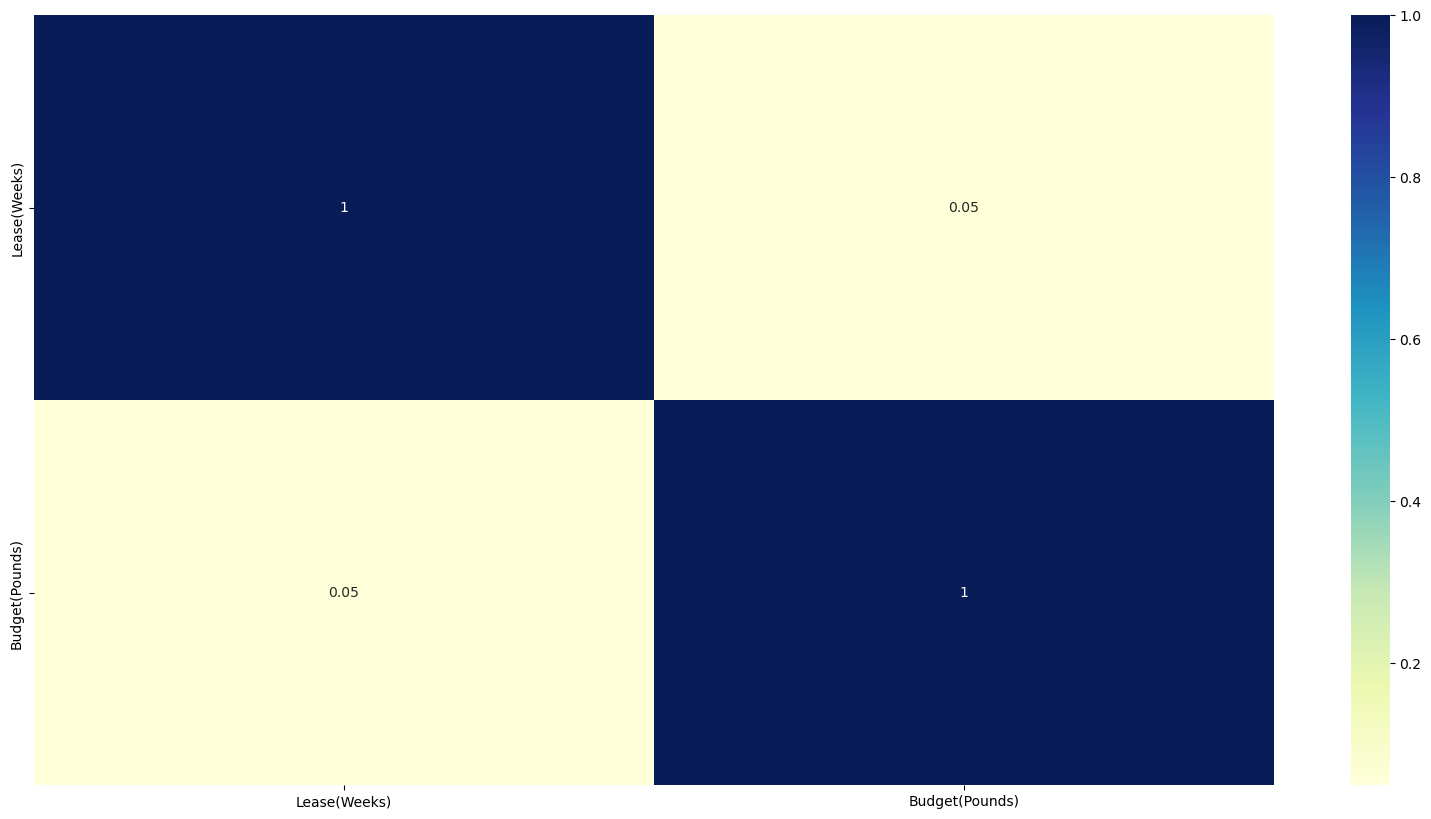

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = df.corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(cm, annot=True, cmap='YlGnBu')

# Data Transformation

In [49]:
mapping = {'LOST':0,'WON':1}
df['status'] = df['status'].map(mapping)
df.head()

,status,lost_reason,room_type,Lease(Weeks),Budget(Pounds)
0,0,Not interested,Entire Place,42,240.0
1,0,Low availability,Ensuite,24,120.0
2,0,Not responding,Ensuite,51,18750.0
3,0,Low availability,Other,43,217.0
4,0,Not interested,Studio,42,120.0


In [50]:
df = pd.get_dummies(df, columns = ['lost_reason','room_type'])
df.head()

,status,Lease(Weeks),Budget(Pounds),lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,...,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,room_type_Ensuite,room_type_Entire Place,room_type_NonEnsuite,room_type_Other,room_type_Studio,room_type_TwinStudio
0,0,42,240.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,24,120.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,51,18750.0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,43,217.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,42,120.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [51]:
df.shape

(32983, 40)

Data Scaling

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Lease(Weeks)','Budget(Pounds)']] = scaler.fit_transform(df[['Lease(Weeks)','Budget(Pounds)']])
df.head()

,status,Lease(Weeks),Budget(Pounds),lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,...,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,room_type_Ensuite,room_type_Entire Place,room_type_NonEnsuite,room_type_Other,room_type_Studio,room_type_TwinStudio
0,0,0.007957,0.000004,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0.004463,0.000002,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0.009703,0.000374,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0.008151,0.000004,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0.007957,0.000002,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


# Train Test Split

In [53]:
x = df.drop(['status'],axis=1)
x.head()

,Lease(Weeks),Budget(Pounds),lost_reason_Booked on campus accommodation,lost_reason_Booked with competitor,lost_reason_Booked with manager,lost_reason_Cross sell,lost_reason_Didn't respond in time,lost_reason_Distance issue,lost_reason_Guarantor issue,lost_reason_Inadequate details,...,lost_reason_Supply issue,lost_reason_Underage student,lost_reason_Visa/admission denied,lost_reason_Wants private accommodation,room_type_Ensuite,room_type_Entire Place,room_type_NonEnsuite,room_type_Other,room_type_Studio,room_type_TwinStudio
0,0.007957,0.000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.004463,0.000002,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.009703,0.000374,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.008151,0.000004,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.007957,0.000002,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [54]:
y = df['status']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: status, dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model Building

In [56]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=3)

Epoch 1/3
825/825 [==============================] - 4s 4ms/step - loss: 0.0339 - accuracy: 0.9911
Epoch 2/3
825/825 [==============================] - 3s 4ms/step - loss: 6.4787e-05 - accuracy: 1.0000
Epoch 3/3
825/825 [==============================] - 3s 4ms/step - loss: 1.6950e-05 - accuracy: 1.0000


# Model Testing

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test accuracy:', test_acc)

207/207 - 1s - loss: 1.1717e-05 - accuracy: 1.0000 - 592ms/epoch - 3ms/step
Test accuracy: 1.0


In [81]:
y_pred = model.predict(x_test)
y_pred *=100
y_pred[:10]

207/207 [==============================] - 1s 2ms/step


array([[1.4593011e-04],
       [9.9995598e+01],
       [1.4593027e-04],
       [9.9979408e+01],
       [1.4592998e-04],
       [5.7429355e-04],
       [3.5345725e-05],
       [3.5212288e-05],
       [2.2317029e-03],
       [4.6189726e-04]], dtype=float32)

# Calculating Lead Score

In [82]:
import numpy as np

y_pred = np.squeeze(y_pred)
y_pred = np.clip(y_pred, 0, 100)
y_pred = np.round(y_pred, 2)
y_pred[:10]

array([  0.  , 100.  ,   0.  ,  99.98,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ], dtype=float32)

In [83]:
predicted_status = []
for score in y_pred:
    if score >= 50:
        predicted_status.append('WON')
    else:
        predicted_status.append('LOST')

In [84]:
predicted_status[:10]

['LOST', 'WON', 'LOST', 'WON', 'LOST', 'LOST', 'LOST', 'LOST', 'LOST', 'LOST']

# Model Evaluation

In [63]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6056
           1       1.00      1.00      1.00       541

    accuracy                           1.00      6597
   macro avg       1.00      1.00      1.00      6597
weighted avg       1.00      1.00      1.00      6597



Text(95.72222222222221, 0.5, 'Truth')

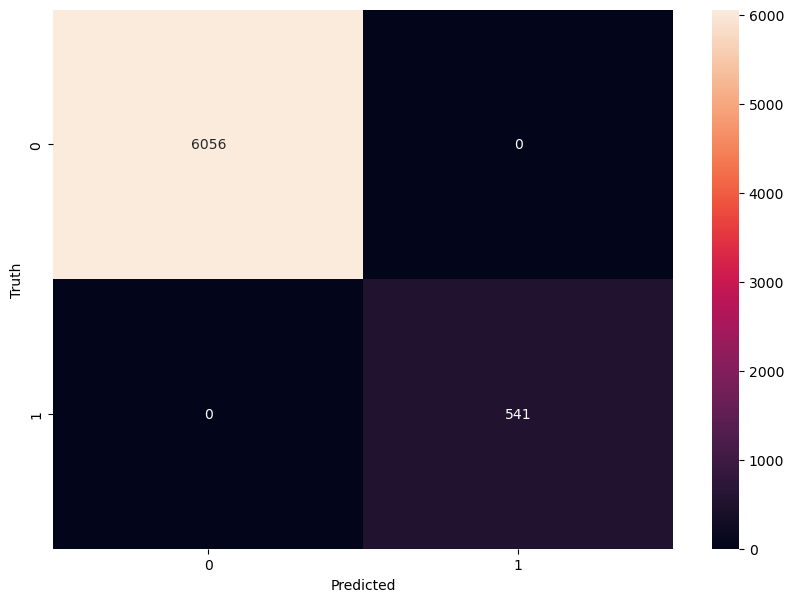

In [64]:
com = tf.math.confusion_matrix(labels=y_test,predictions=yp)

plt.figure(figsize = (10,7))
sns.heatmap(com, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate accuracy
accuracy = accuracy_score(y_test, yp)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [66]:
# Calculate precision
precision = precision_score(y_test, yp, pos_label=1) #pos_label=1 means WON
print('Precision:', precision)

Precision: 1.0


In [67]:
# Calculate recall
recall = recall_score(y_test, yp, pos_label=1) #pos_label=1 means WON
print('Recall:', recall)

Recall: 1.0


In [68]:
# Calculate F1-score
f1 = f1_score(y_test, yp, pos_label=1) #pos_label=1 means WON
print('F1-score:', f1)

F1-score: 1.0


# Save Model

In [69]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets
